# Species Segmentation with Cluster Analysis

## Import the relevant libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [32]:
data=pd.read_csv("iris_dataset.csv")

## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

<function matplotlib.pyplot.show(close=None, block=None)>

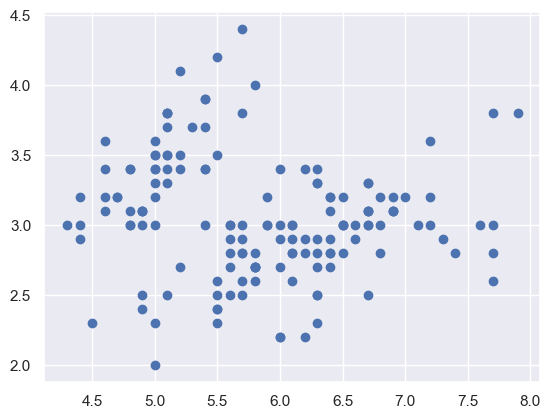

In [5]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.show

# Clustering (unscaled data)

Separate the original data into 3 clusters, as an example:

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

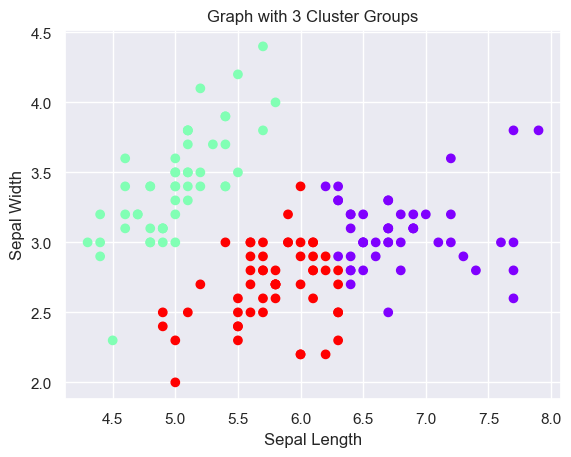

In [30]:
x=data.iloc[:,0:2]
kmeans=KMeans(3)
kmeans.fit(x)
identified_clusters=kmeans.fit_predict(x)
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
plt.scatter(data['sepal_length'],data['sepal_width'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title('Graph with 3 Cluster Groups')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. This is done to better understand the replationship between varaibles.

In [28]:
from sklearn import preprocessing 
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# Clustering (scaled data)

Text(0, 0.5, 'Sepal Width Scaled')

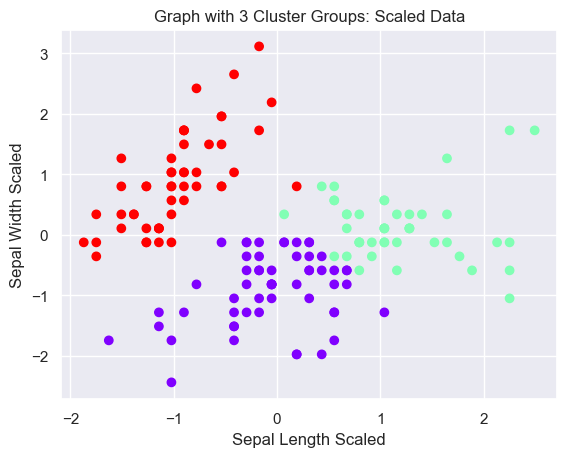

In [76]:
x_scaled_data=[]
y_scaled_data=[]
for i in range(0,len(x_scaled)):
    x_scaled_data.append(x_scaled[i,0])
    y_scaled_data.append(x_scaled[i,1])

kmeans=KMeans(3)
kmeans.fit(x_scaled)
identified_clusters_scaled=kmeans.fit_predict(x_scaled)
data_with_clusters_scaled=x_scaled.copy()

plt.scatter(x_scaled_data,y_scaled_data,c=identified_clusters_scaled,cmap='rainbow')

plt.title('Graph with 3 Cluster Groups: Scaled Data')
plt.xlabel('Sepal Length Scaled')
plt.ylabel("Sepal Width Scaled")


## Take Advantage of the Elbow Method

### WCSS

In [8]:
wcss=[]

for i in range(1,12):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
wcss

number_cluster=range(1,12)

### The Elbow Method

Text(0, 0.5, 'WCSS')

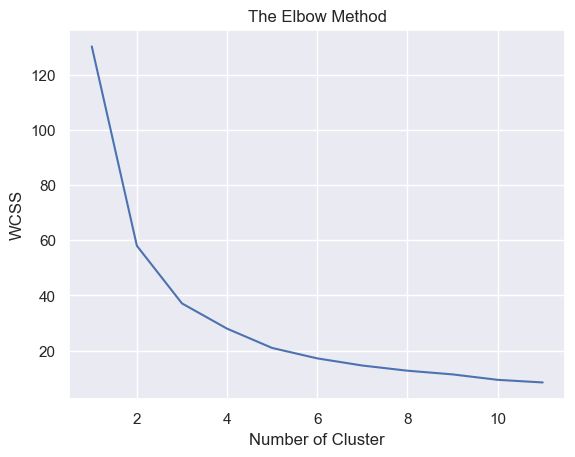

In [10]:
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

How many clusters are there? 
4 is the answers from the elbow method

# Final Cluster Plot based on Elbow method

<function matplotlib.pyplot.show(close=None, block=None)>

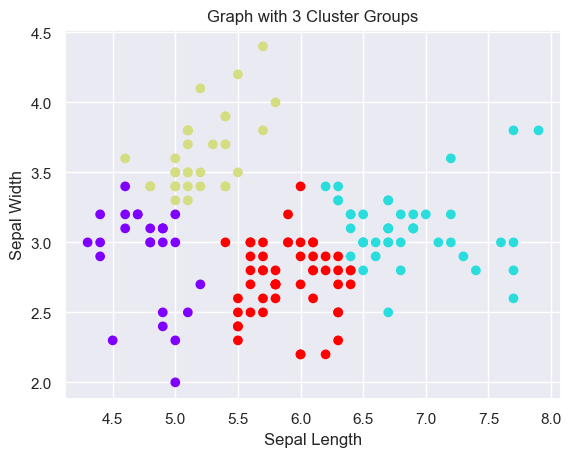

In [77]:
kmeans=KMeans(4)
kmeans.fit(x)
identified_clusters=kmeans.fit_predict(x)
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
plt.scatter(data['sepal_length'],data['sepal_width'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title('Graph with 3 Cluster Groups: ELbow Method')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show